Time series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
Data = pd.read_csv("exchange_rate.csv")

In [2]:
Data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [4]:
Data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [5]:
Data.describe().round(4)

,Ex_rate
count,7588.0000
mean,0.7770
std,0.1366
min,0.4833
25%,0.7014
50%,0.7614
75%,0.8735
max,1.1025


In [6]:
Data.set_index('date', inplace=True)

In [7]:
Data

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


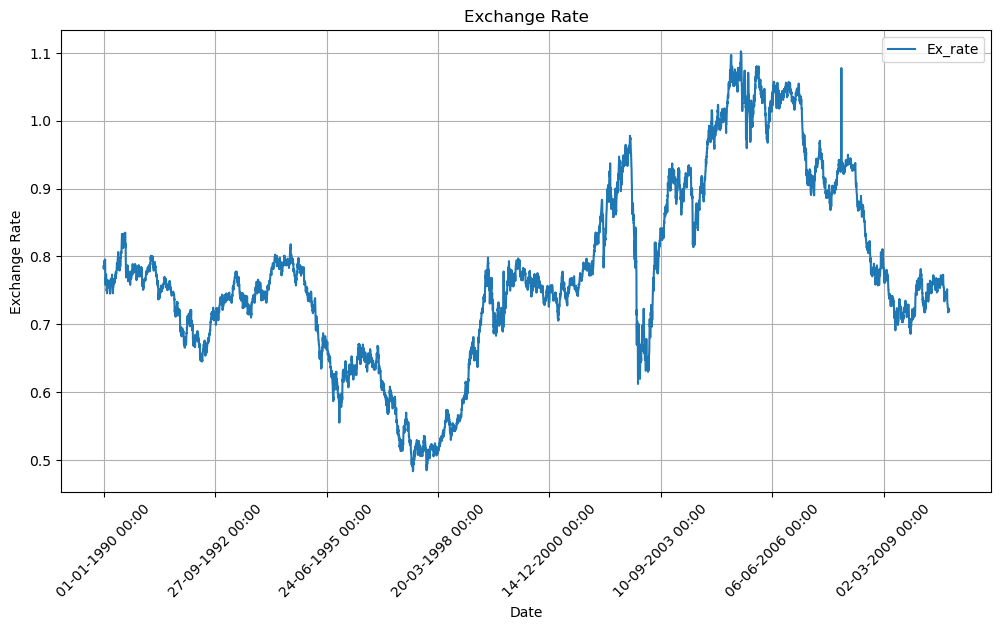

In [8]:
Data.plot(figsize=(12, 6))
plt.title('Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

From the data, we can see that the date range of the exchange rate given is from 1990 to 2009, the exchange rate is from 0.5 to 1.1
from 1990 there is a dip in tread and small raise till 1992 
then after 1992 there is a small raise and a big decline at end of 1998 and after that it is increases higher than the previous years and a sharp dip around end of 2003 and a very large increase at 2004 and decline in 2009

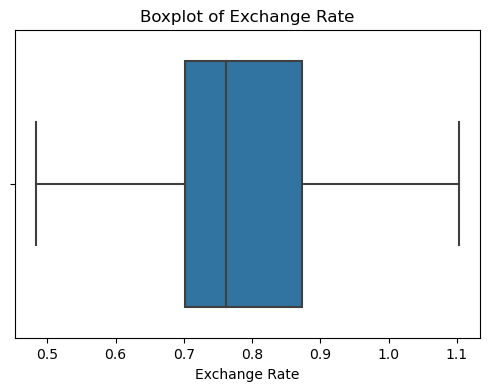

In [9]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=Data['Ex_rate'])
plt.title("Boxplot of Exchange Rate")
plt.xlabel("Exchange Rate")
plt.show()


In [10]:
# itseems there are no outliers and all the data is within the range between 0.5 to 1.1

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(Data['Ex_rate'], model='additive', period=365)


A seasonality plot helps you detect repeating patterns and understand whether your time series has trend, seasonality, or just noise, so you can choose the right forecasting model.

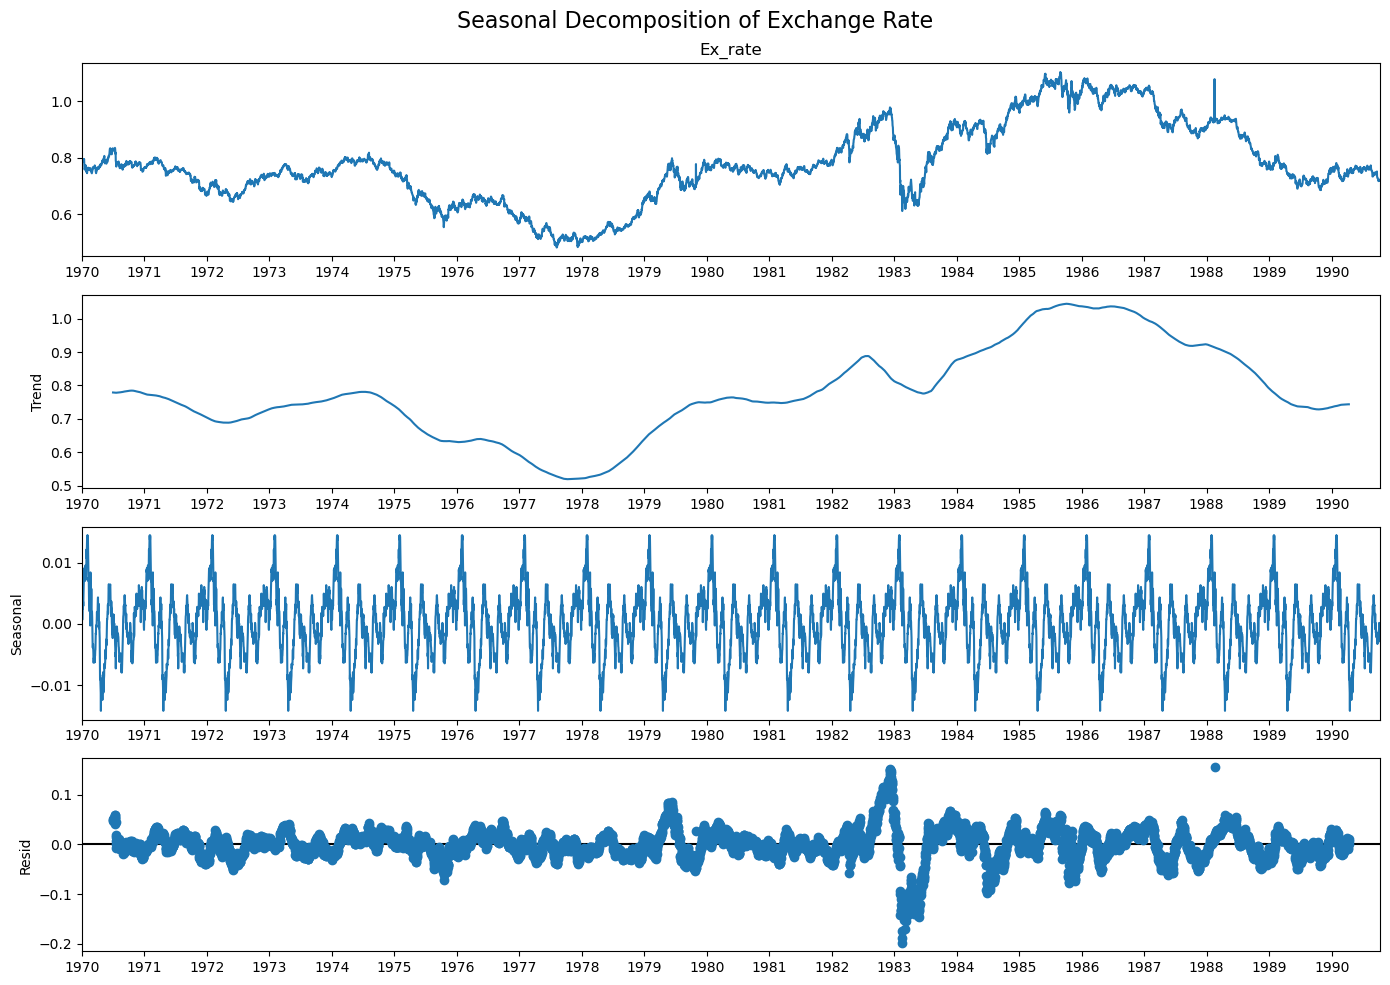

In [12]:
import matplotlib.dates as mdates
fig = result.plot()
fig.set_size_inches(14, 10)
plt.suptitle("Seasonal Decomposition of Exchange Rate", fontsize=16)
for ax in fig.axes:
    ax.xaxis.set_major_locator(mdates.YearLocator()) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

The orginal trend shows an upward trend from 1970 to  1987 emeaning the currency was becoming more valuable. Around 1987, there's a sharp drop.
The trend confirms a steady increase in exchange rate value until 1987, then a decline.
The consistent wave-like pattern suggests strong seasonality.
The residuals id noticeable around the mid-1980s.

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
result = adfuller(Data['Ex_rate'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -1.66499418073814
p-value: 0.4492327353597968


In [14]:
# the p value is very high and fails to reject the null hypothesis. the time series is non stationary

In [15]:
# the ADL is also less negative which again fails to reject the null hypothesis

In [16]:
Data['Ex_rate_diff'] = Data['Ex_rate'].diff().dropna()

In [17]:
result_diff = adfuller(Data['Ex_rate_diff'].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]}")
print(f"p-value (Differenced): {result_diff[1]}")

ADF Statistic (Differenced): -99.3934312011863
p-value (Differenced): 0.0


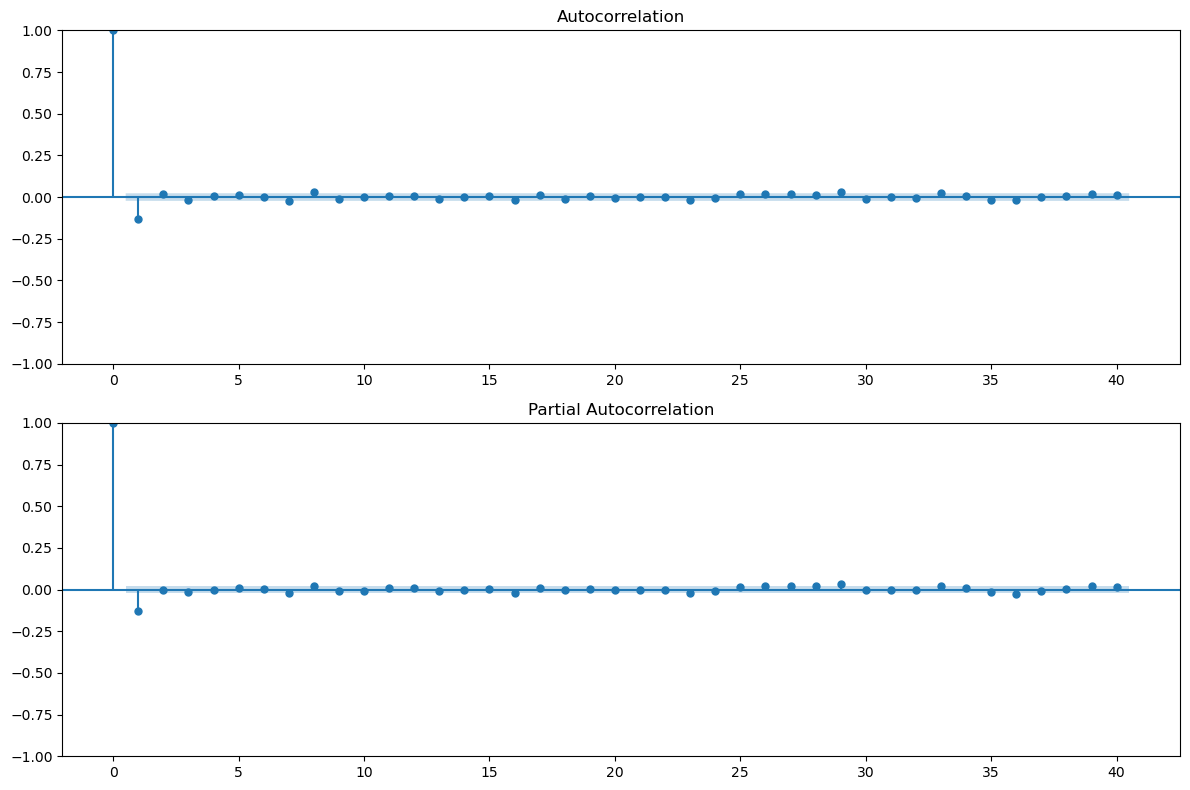

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(Data['Ex_rate_diff'].dropna(), ax=ax[0], lags=40)
plot_pacf(Data['Ex_rate_diff'].dropna(), ax=ax[1], lags=40)
plt.tight_layout()
plt.show()

In [19]:
# ACF - it drops quickly after zero at 1 and then the values stay close to zero line

In [20]:
from statsmodels.tsa.arima.model import ARIMA
warnings.simplefilter('ignore')
model_arima = ARIMA(Data['Ex_rate'], order=(1, 1, 1))
model_fit_arima = model_arima.fit()
print(model_fit_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 24 Sep 2025   AIC                         -56102.322
Time:                        22:26:43   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

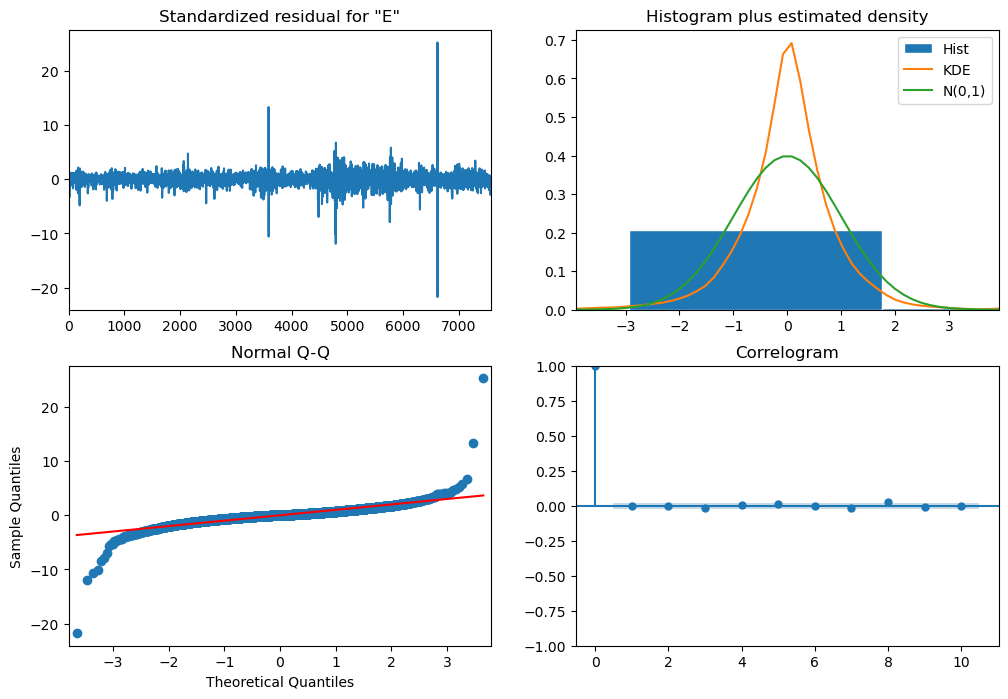

In [21]:
model_fit_arima.plot_diagnostics(figsize=(12, 8))
plt.show()

the plot shown are for arima model the residual plot is aroung zero line which is good. the histogram 

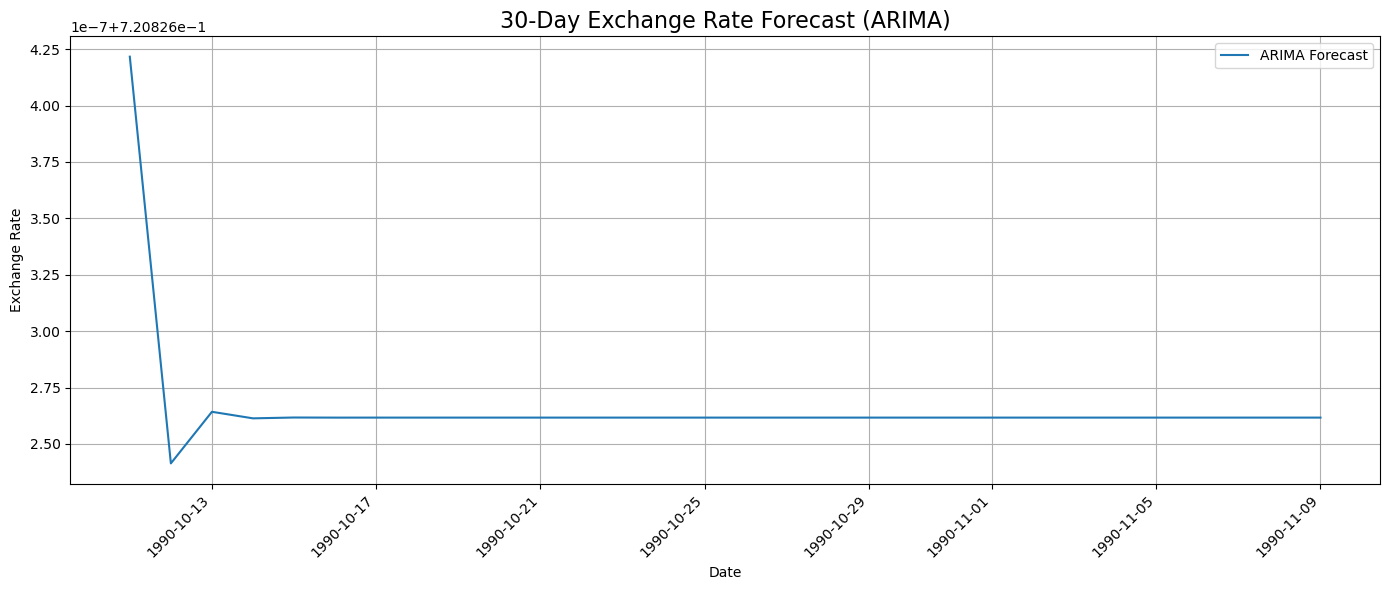

In [23]:
forecast = model_fit_arima.forecast(steps=30)
plt.figure(figsize=(14, 6))
plt.plot(forecast, label='ARIMA Forecast', color='tab:blue')
plt.title("30-Day Exchange Rate Forecast (ARIMA)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Exchange Rate")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# the model has converged to a stable prediction after a decline at the initial 

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_es = ExponentialSmoothing(Data['Ex_rate'], trend='add', seasonal=None)
model_fit_es = model_es.fit()

In [26]:
print(model_fit_es.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Wed, 24 Sep 2025
Box-Cox:                          False   Time:                         22:27:09
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700402                alpha                 True
smoothing_trend           3.9988e-

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train = Data['Ex_rate'][:-30]
test = Data['Ex_rate'][-30:]
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
es_model = ExponentialSmoothing(train, trend='add', seasonal=None).fit()
arima_pred = arima_model.forecast(steps=30)
es_pred = es_model.forecast(30)
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = (abs((y_true - y_pred) / y_true).mean()) * 100
    print(f"\n{model_name} Evaluation:")
    print(f"MAE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")

evaluate(test, arima_pred, "ARIMA")
evaluate(test, es_pred, "Exponential Smoothing")


ARIMA Evaluation:
MAE: 0.0003
RMSE: 0.0166
MAPE: nan%

Exponential Smoothing Evaluation:
MAE: 0.0003
RMSE: 0.0165
MAPE: nan%


there is only very small error between two suggesting similar performance and MAPE is unreliable in this dataset. Both ARIMA and smoothing aare highly effective and accuarate

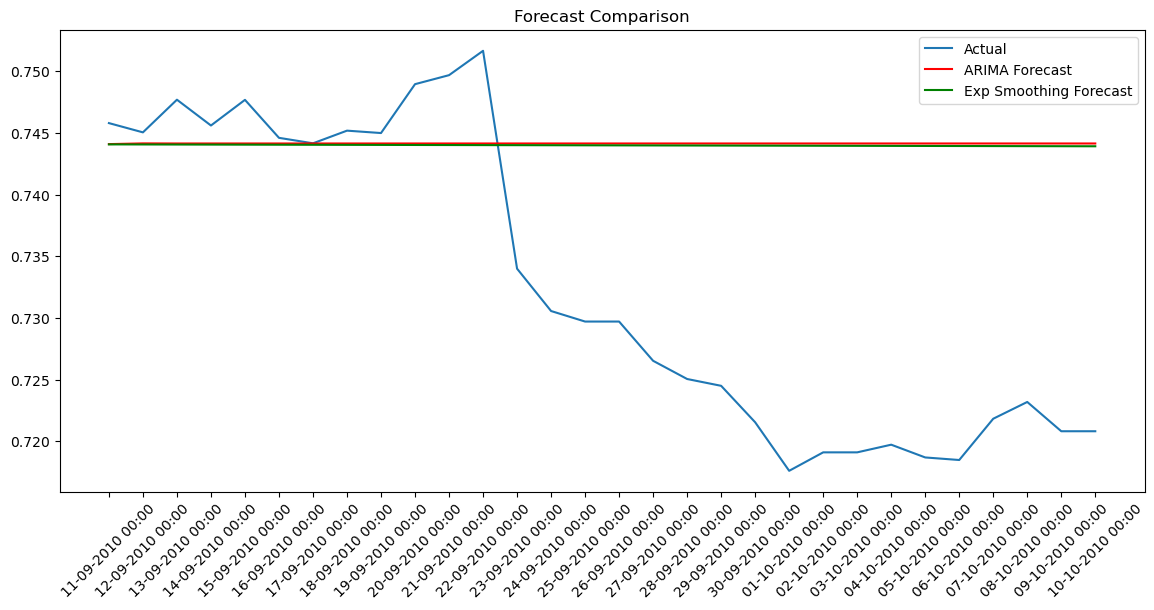

In [28]:
plt.figure(figsize=(14, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_pred, label='ARIMA Forecast', color='red')
plt.plot(test.index, es_pred, label='Exp Smoothing Forecast', color='green')
plt.title("Forecast Comparison")
plt.xticks(rotation = 45)
plt.legend()
plt.show()


In [ ]:
# the actual data starts of good but then shows a significant decline. may be economic crisis etc. 